# Binary Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.random.seed(42)
random.seed(42)

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv("Project_1_dataset_01_01_2022.csv")
df.head()

,Unnamed: 0,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,590,Having made a massive impact in Saudi Arabia w...,Having made a massive impact in Saudi Arabia w...,"['singhs', 'rooting', 'cool', 'saudi', 'style'...",NaN,[],https://www.msn.com/en-in/entertainment/other/...,cricket,sports
1,388,Cricket is all about the emotional rollercoast...,"No matter which team fans hope to win, every s...","['wants', 'fans', 'finals', 'cup', 'win', 'tou...",NaN,[],https://www.prnewswire.com:443/news-releases/c...,cricket,sports
2,423,New Zealand announces back-to-back tours next ...,New Zealand announces back-to-back tours next ...,"['test', 'west', 'tour', 'zealand', 'world', '...",2021-12-20 00:00:00,[],https://www.aljazeera.com/news/2021/12/20/cric...,cricket,sports
3,563,It's not the first time cricket fans in the co...,Billed as one of the pre-tournament favourites...,"['qualify', 'afghanistan', 'cup', 'world', 'ze...",NaN,[],https://www.msn.com/en-in/news/other/t20-world...,cricket,sports
4,634,An employee works on a computer terminal again...,"REUTERS/Sivaram VBENGALURU, Oct 11 (Reuters Br...","['success', 'tech', 'startup', 'talent', 'onli...",2021-10-11 00:00:00,['Una Galani'],https://www.reuters.com/breakingviews/india-in...,cricket,sports


In [3]:
df.shape

(2072, 9)

**Question 1**: The dataset contains 2072 samples (rows) and 9 features (columns).

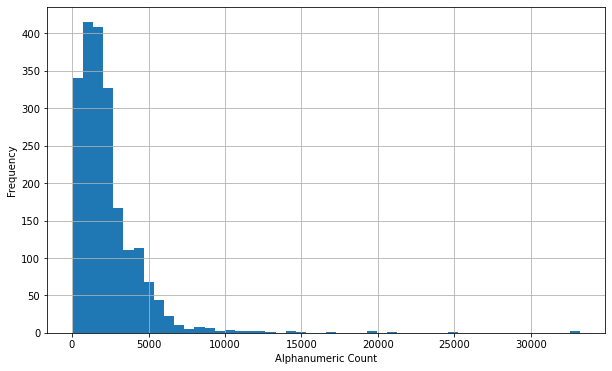

In [3]:
# histogram of alphanumeric characters

df["alnum_count"] = df['full_text'].str.count('[A-Za-z0-9]') # alphanumeric count feature to dataset

ax = df["alnum_count"].hist(bins=50, figsize=(10,6)) # experiment with 50-100 bins
ax.set_xlabel("Alphanumeric Count")
ax.set_ylabel("Frequency")

plt.show()

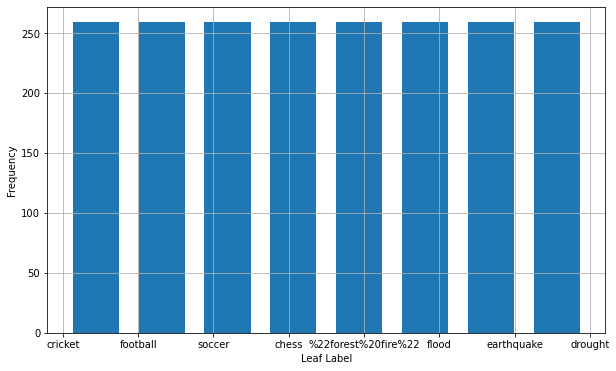

In [4]:
# histogram of leaf labels

ax = df["leaf_label"].hist(bins=8, figsize=(10,6), rwidth=0.7)
ax.set_xlabel("Leaf Label")
ax.set_ylabel("Frequency")
plt.show()

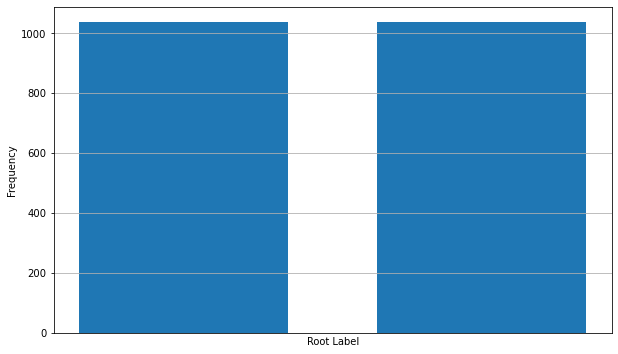

In [5]:
# histogram of root labels

ax = df["root_label"].hist(bins=2, figsize=(10,6), rwidth=0.7)
ax.set_xlabel("Root Label")
ax.set_ylabel("Frequency")
plt.show()

**Question 1**: The histogram of alphanumeric characters in full_text follows a skewed bell-shaped curve, where the highest frequencies occur at around 2000 alphanumeric characters, and the frequency tapers off for higher alphanumeric counts, with documents containing more than approximately 7000 occuring very rarely. The histograms for leaf_label and root_label show that frequencies of the labels are the same across all classes, so the classes are balanced in this dataset.

## Splitting entire dataset

In [80]:
from sklearn.model_selection import train_test_split

df_1 = df[["full_text","root_label"]] # data for part 1
train, test = train_test_split(df_1, test_size=0.2)

print(train.shape)
print(test.shape)

(1657, 2)
(415, 2)


**Question 2**: There are 1657 training samples and 415 testing samples.

## Feature extraction

In [152]:
import re
def clean(text):
    # removes many HTML artefacts from the crawler's output
    # text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    # texter = text.lower() # added to firt make letters lowercase, so e.g. "Having" gets converted to "having" to be correctly lemmatized to "have"
    texter = re.sub(r'http\S+', '', text, flags=re.MULTILINE) # remove URLs (e.g. in sample 2)
    texter = re.sub(r'\S+\.com', '', texter, flags=re.MULTILINE) # remove URLs ending in .com that were not removed by previous lines (e.g. in sample 11)
    texter = re.sub(r'www\S+', '', texter, flags=re.MULTILINE) # remove URLs ending in with www that were not removed by previous lines (e.g. in sample 18)
    texter = re.sub(r"<br />", " ", texter)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ', texter)
    texter = re.sub(r'\d+th', '', texter) # remove number terms like "1st", "2nd", "3rd", etc.
    texter = re.sub(r'\d+st', '', texter)
    texter = re.sub(r'\d+nd', '', texter)
    texter = re.sub(r'\d+rd', '', texter)
    texter = re.sub(r'\d+s', '', texter) # remove years like "1970s"
    texter = re.sub(r'(?<=[a-zA-Z])\-(?=[a-zA-Z])', ' ', texter) # replace hyphens joining two words
    # texter = re.sub(r'(?<=[a-zA-Z])\'(?=[a-zA-Z])', '', texter) # remove apostrophes in words
    # texter = re.sub(r'(?<=[a-zA-Z])\.(?=[a-zA-Z])', '', texter) # remove periods within acronyms
    texter = re.sub(r'(?<=[a-zA-Z])/(?=[a-zA-Z])', ' ', texter) # replace slashes joining two words
    # texter = re.sub(r'[^a-z0-9 ]+', ' ', texter) # remove all remaining punctuation
    # texter = re.sub(r'\b(-|\d*)\d+(\.|\d*)\d*(%|\d*)\b', '', texter) # remove all number terms, including negatives and decimals
    texter = re.sub(r'\b[^a-z0-9 ]*\d+[^a-z0-9 ]*\b', '', texter) # remove all numbers
    texter = re.sub(r'\-\d+\b', '', texter) # remove negative numbers
    texter = re.sub(r'\b[^a-z0-9 ]*\d+\.\d+[^a-z0-9 ]*\b', '', texter) # remove decimal numbers
    texter = re.sub(r'-\d+\.\d+\b', '', texter) # remove negative decimal numbers
    texter = re.sub(r'\ba\d+', '', texter)
    texter = re.sub(r'\d+(a|p)m', '', texter)
    texter = re.sub(r'__', ' ', texter) # remove __
    texter = re.sub(' +', ' ', texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [153]:
train["clean_text"] = train["full_text"].apply(clean)
train

,full_text,root_label,clean_text,lem_text
328,HOUSTON (AP) — The Houston Texans looked to be...,sports,HOUSTON (AP) The Houston Texans looked to be ...,houston (ap) the houston texan look way win op...
1794,Hide Transcript Show Transcript\n\nANIMALS A S...,climate,Hide Transcript Show Transcript ANIMALS A SMAL...,hide transcript show transcript animal a small...
1996,© PA Wire Royal tour of the Middle East – Day ...,climate,PA Wire Royal tour of the Middle East Day Th...,pa wire royal tour middle east day the prince ...
681,Houston is in the running to be named one of 1...,sports,Houston is in the running to be named one of U...,houston running name u.s. city host fifa men w...
1416,The Fukushima Daiichi plant suffered a triple ...,climate,The Fukushima Daiichi plant suffered a triple ...,the fukushima daiichi plant suffer triple melt...
...,...,...,...,...
220,© PA Images Newlands-cricket-stadium\n\nSouth ...,sports,PA Images Newlands cricket stadium South Afri...,pa image newlands cricket stadium south africa...
1422,"NORTHUMBERLAND COUNTY, Va. — The National Weat...",climate,"NORTHUMBERLAND COUNTY, Va. The National Weath...","northumberland county, va. the national weathe..."
83,© Provided by Crikey\n\nTen and the Matildas w...,sports,Provided by Crikey Ten and the Matildas won t...,provide crikey ten matildas weekend nationally...
873,Microsoft is finally shipping an updated versi...,sports,Microsoft is finally shipping an updated versi...,microsoft finally ship updated version file ex...


In [154]:
test["clean_text"] = test["full_text"].apply(clean)
test

,full_text,root_label,clean_text,lem_text
1369,Credit: CC0 Public Domain\n\nA reliable early ...,climate,Credit: Public Domain A reliable early warning...,credit: public domain a reliable early warning...
772,© Provided by Independent Online (IOL)\n\nCape...,sports,Provided by Independent Online (IOL) Cape Tow...,provide independent online (iol) cape town sou...
1762,Tremor International Ltd. Announces Conference...,climate,Tremor International Ltd. Announces Conference...,tremor international ltd. announces conference...
1378,In the complex and often confusing world of fl...,climate,In the complex and often confusing world of fl...,"in complex confusing world flood insurance, di..."
2014,To the editor: With our continued dire drought...,climate,To the editor: With our continued dire drought...,to editor: with continued dire drought expert ...
...,...,...,...,...
553,Gianni Infantino has called World Cups hosted ...,sports,Gianni Infantino has called World Cups hosted ...,gianni infantino call world cup host single na...
746,Country\n\nUnited States of America US Virgin ...,sports,Country United States of America US Virgin Isl...,country united state america u virgin island u...
37,MELBOURNE (Reuters) – Australia’s human rights...,sports,MELBOURNE (Reuters) Australias human rights w...,melbourne (reuters) australia human right watc...
1750,© Provided by Charleston WCSC-TV Generic earth...,climate,Provided by Charleston WCSC TV Generic earthq...,provide charleston wcsc tv generic earthquake ...


In [ ]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
import nltk

# def lemmatize_text(text):
#     w_tokenizer = WhitespaceTokenizer()
#     wnl = WordNetLemmatizer()
#     pos_tags = pos_tag(w_tokenizer.tokenize(text))
#     return " ".join([wnl.lemmatize(w, pos=penn2morphy(tag)) for w, tag in pos_tags])

wnl = nltk.wordnet.WordNetLemmatizer()
def lemmatize_sent(text):
    # lemmatize a sentence as a list of words
    w_tokenizer = WhitespaceTokenizer()
    # lem_text = []
    # for sent in sent_tokenize(text):
    #     for word, tag in pos_tag(w_tokenizer.tokenize(sent)):
    #         lem_text.append(wnl.lemmatize(word.lower(), pos=penn2morphy(tag)))
    # return lem_text
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(w_tokenizer.tokenize(text)) if word not in combined_stopwords and not word.isdigit()]

morphy_tag = {'NN':'n', 'JJ':'a',
              'VB':'v', 'RB':'r'}
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    return morphy_tag.get(penntag[:2], 'n')
    

In [144]:
test1 = 'Good muffins cost 80 $3.88 in New York 40. Please buy me two of them. Thanks.'
lem_analyzer(test1)

'Good muffins cost $ in New York . Please buy me two of them. Thanks.'

In [ ]:
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')

combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
combined_stopwords

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

analyzer = CountVectorizer().build_analyzer()

def lem_analyzer(text):
    words = []
    for sent in sent_tokenize(text):
        # for word in analyzer(sent):
        # if word not in combined_stopwords and not word.isdigit():
        words += lemmatize_sent(sent)
    return " ".join(words)
    # return (word for word in lemmatize_sent(analyzer(text)) if word not in combined_stopwords and not word.isdigit())

In [155]:
train["lem_text"] = train["clean_text"].apply(lem_analyzer)
train

,full_text,root_label,clean_text,lem_text
328,HOUSTON (AP) — The Houston Texans looked to be...,sports,HOUSTON (AP) The Houston Texans looked to be ...,houston (ap) the houston texan look way win op...
1794,Hide Transcript Show Transcript\n\nANIMALS A S...,climate,Hide Transcript Show Transcript ANIMALS A SMAL...,hide transcript show transcript animal a small...
1996,© PA Wire Royal tour of the Middle East – Day ...,climate,PA Wire Royal tour of the Middle East Day Th...,pa wire royal tour middle east day the prince ...
681,Houston is in the running to be named one of 1...,sports,Houston is in the running to be named one of U...,houston running name u.s. city host fifa men w...
1416,The Fukushima Daiichi plant suffered a triple ...,climate,The Fukushima Daiichi plant suffered a triple ...,the fukushima daiichi plant suffer triple melt...
...,...,...,...,...
220,© PA Images Newlands-cricket-stadium\n\nSouth ...,sports,PA Images Newlands cricket stadium South Afri...,pa image newlands cricket stadium south africa...
1422,"NORTHUMBERLAND COUNTY, Va. — The National Weat...",climate,"NORTHUMBERLAND COUNTY, Va. The National Weath...","northumberland county, va. the national weathe..."
83,© Provided by Crikey\n\nTen and the Matildas w...,sports,Provided by Crikey Ten and the Matildas won t...,provide crikey ten matildas weekend nationally...
873,Microsoft is finally shipping an updated versi...,sports,Microsoft is finally shipping an updated versi...,microsoft finally ship updated version file ex...


In [156]:
test["lem_text"] = test["clean_text"].apply(lem_analyzer)
test

,full_text,root_label,clean_text,lem_text
1369,Credit: CC0 Public Domain\n\nA reliable early ...,climate,Credit: Public Domain A reliable early warning...,credit: public domain a reliable early warning...
772,© Provided by Independent Online (IOL)\n\nCape...,sports,Provided by Independent Online (IOL) Cape Tow...,provide independent online (iol) cape town sou...
1762,Tremor International Ltd. Announces Conference...,climate,Tremor International Ltd. Announces Conference...,tremor international ltd. announces conference...
1378,In the complex and often confusing world of fl...,climate,In the complex and often confusing world of fl...,"in complex confusing world flood insurance, di..."
2014,To the editor: With our continued dire drought...,climate,To the editor: With our continued dire drought...,to editor: with continued dire drought expert ...
...,...,...,...,...
553,Gianni Infantino has called World Cups hosted ...,sports,Gianni Infantino has called World Cups hosted ...,gianni infantino call world cup host single na...
746,Country\n\nUnited States of America US Virgin ...,sports,Country United States of America US Virgin Isl...,country united state america u virgin island u...
37,MELBOURNE (Reuters) – Australia’s human rights...,sports,MELBOURNE (Reuters) Australias human rights w...,melbourne (reuters) australia human right watc...
1750,© Provided by Charleston WCSC-TV Generic earth...,climate,Provided by Charleston WCSC TV Generic earthq...,provide charleston wcsc tv generic earthquake ...


In [157]:
vectorizer = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = vectorizer.fit_transform(train["lem_text"])
X_test_counts = vectorizer.transform(test["lem_text"])
print(X_train_counts.shape)
print(X_test_counts.shape)

(1657, 10979)
(415, 10979)


In [158]:
print(vectorizer.get_feature_names_out()[0:100])

['00pm' '08837phone' '10km' '10pm' '247sports' '25m' '2am' '30am' '30pm'
 '49ers' '5km' '8pm' 'aalst' 'aap' 'aaron' 'ab' 'abandon' 'abbott' 'abby'
 'abc' 'abdul' 'abdullah' 'abhishek' 'abide' 'abilities' 'ability'
 'abject' 'ablate' 'able' 'abnormally' 'abolish' 'aboriginal' 'abraham'
 'abrahamyan' 'abroad' 'abrupt' 'absence' 'absent' 'absolute' 'absolutely'
 'absorb' 'abstract' 'abu' 'abundance' 'abundant' 'abuse' 'abusive' 'ac'
 'academic' 'academy' 'acc' 'accelerate' 'accent' 'accents' 'accept'
 'acceptance' 'access' 'accessibility' 'accessible' 'accessory' 'accident'
 'accidentally' 'accolade' 'accomack' 'accommodation' 'accompany'
 'accomplice' 'accomplish' 'accomplished' 'accomplishment' 'accord'
 'accordance' 'according' 'accordingly' 'account' 'accountability'
 'accountable' 'accounting' 'accounts' 'accredited' 'accumulate'
 'accumulation' 'accuracy' 'accurate' 'accurately' 'accusation' 'accuse'
 'accuweather' 'ace' 'achieve' 'achievement' 'achievements' 'acid'
 'acknowledge' '

In [84]:
vectorizer = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = vectorizer.fit_transform(train["clean_text"])
X_test_counts = vectorizer.transform(test["clean_text"])
print(X_train_counts.shape)
print(X_test_counts.shape)

TypeError: unhashable type: 'list'

In [57]:
print(vectorizer.get_feature_names_out()[0:100])

['00pm' '08837phone' '10km' '10pm' '17f' '1a' '247sports' '25m' '2am'
 '30am' '30pm' '3a' '3d' '49ers' '4a' '4g' '5km' '6a' '6pm' '8pm' '__'
 'a3' 'a4' 'a5' 'a6' 'a7' 'aalst' 'aap' 'aaron' 'abandon' 'abate' 'abbott'
 'abby' 'abc' 'abc10' 'abdul' 'abdullah' 'abhishek' 'abide' 'ability'
 'abject' 'able' 'abner' 'abnormal' 'abnormally' 'abolish' 'aboriginal'
 'abraham' 'abrahamyan' 'abroad' 'absence' 'absent' 'absolute'
 'absolutely' 'absorb' 'absorbed' 'abstract' 'abu' 'abundance' 'abundant'
 'abuse' 'abusive' 'ac' 'academic' 'academy' 'acb' 'acc' 'accelerate'
 'accelerates' 'accent' 'accept' 'acceptable' 'acceptance' 'accepted'
 'access' 'accessibility' 'accessible' 'accessory' 'accident' 'acclaim'
 'accolade' 'accomack' 'accompany' 'accomplice' 'accomplish'
 'accomplishment' 'accord' 'accordance' 'accordingly' 'account'
 'accountability' 'accountable' 'accounting' 'accredit' 'accumulate'
 'accumulation' 'accuracy' 'accurate' 'accurately' 'accusation']


In [100]:
print(X_train_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [101]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(1657, 10047)
(415, 10047)


In [122]:
# put into pipeline
# pipe = Pipeline([('count', CountVectorizer()),
#                  ('tfid', TfidfTransformer(smooth_idf=False))])
# pipe.fit(df_1["clean_text"])

**Question 3**:
* Stemming simply removes the rightmost characters of words, which can result in non-existent and incorrect word stems. It can be useful for simplifying a database of words when many terms have the same meaning but with different affixes. Lemmatizing uses linguistic rules to find a root word, guarantees that the result is a real word, but may return a different word with a similar meaning. For example, "better" will be lemmatized to "good" when the part of speech is specified as an adjective. Stemming can produce a dictionary of a smaller size, because it is more aggressive at simplifying words than lemmatization is. Lemmatization leaves the word unchanged if it cannot find a lemma for it, whereas stemming will apply a set of rules to all words to reduce them as much as possible.
*
* Stopwords should be removed after lemmatizing, because some stopwords in the text may occur in various forms that do not match the defined set of stopwords exactly. For example, the sklearn set of stopwords includes "name" but not "names". Punctuation should be removed before lemmatizing, as words with puntuation are not lemmatized correctly. For instance "hours," is not lemmatized to "hour" since the comma is included. Lemmatizing before stopwords would remove variations of stopwords as intended. Numbers were removed in the clean() function before lemmatizing, since lemmatizing operates on words and not number terms, and lemmatizing a number simply returns the same number, so removing numbers first avoids unecessary processing.
*


## Dimensionality reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

k_list = [1, 10, 50, 100, 200, 500, 1000, 2000]
var_list = []

for k in k_list:
    lsi = TruncatedSVD(n_components=k, n_iter=100)
    lsi.fit(X_train_tfidf)
    var_list.append(lsi.explained_variance_ratio_.sum())

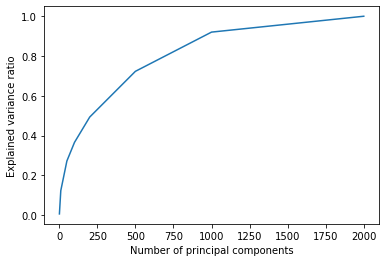

In [460]:
plt.figure()
plt.plot(k_list, var_list)
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.show()

**Question 4**: The plot is an increasing curve that rises quickly at small $k$ and slowly at large $k$. The concavity suggests that the principal components corresponding to the largest few singular values contain more of the information about the dataset than the same number of components corresponding to smaller singular values. After about 1000 features, keeping more features does not increase the explained variance ratio a lot and would likely not improve classification performance much.

In [105]:
k = 50
lsi = TruncatedSVD(n_components=k, n_iter=100)
X_train_lsi = lsi.fit_transform(X_train_tfidf)
print(X_train_lsi.shape)

(1657, 50)


In [112]:
U = X_train_lsi / lsi.singular_values_
Sigma_matrix = np.diag(lsi.singular_values_)
VT = lsi.components_
Xk = np.matmul(U, np.matmul(Sigma_matrix,VT)) # approximate X from SVD

In [119]:
# reconstruction residual of LSI
np.linalg.norm(X_train_tfidf-Xk, ord='fro')**2

1182.333052617533

In [472]:
from sklearn.decomposition import NMF

k = 50
nmf_model = NMF(n_components=k, init='random')
W_train = nmf_model.fit_transform(X_train_tfidf)
print(W_train.shape)

H = nmf_model.components_
print(H.shape)

(1657, 50)
(50, 9932)


In [473]:
# reconstruction residual of NMF
np.linalg.norm(X_train_tfidf-np.matmul(W_train,H), ord='fro')**2

1190.1201174086234